# Heart Attack

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.


This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.

# Import Dependencies

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from mlxtend.classifier import StackingCVClassifier
import pickle

# Import Data

In [2]:
dataset=pd.read_csv("heart_attack.csv")

# EDA

# Attribute Information of Dataset

1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [3]:
dataset.shape

(918, 12)

In [4]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

[Text(0, 0, '725'), Text(0, 0, '193')]

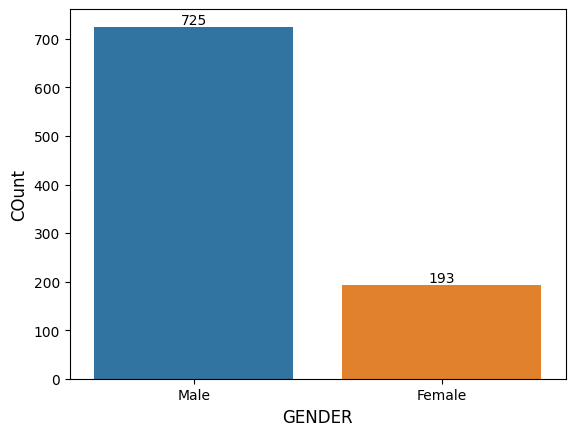

In [9]:
M,F=dataset["Sex"].value_counts()
ax=sns.barplot(x=["Male","Female"],y=[M,F])
plt.xlabel("GENDER",size=12)
plt.ylabel("COunt",size=12)
ax.bar_label(ax.containers[0])

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '11'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '11'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '19'),
 Text(0, 0, '15'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '28'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '23'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

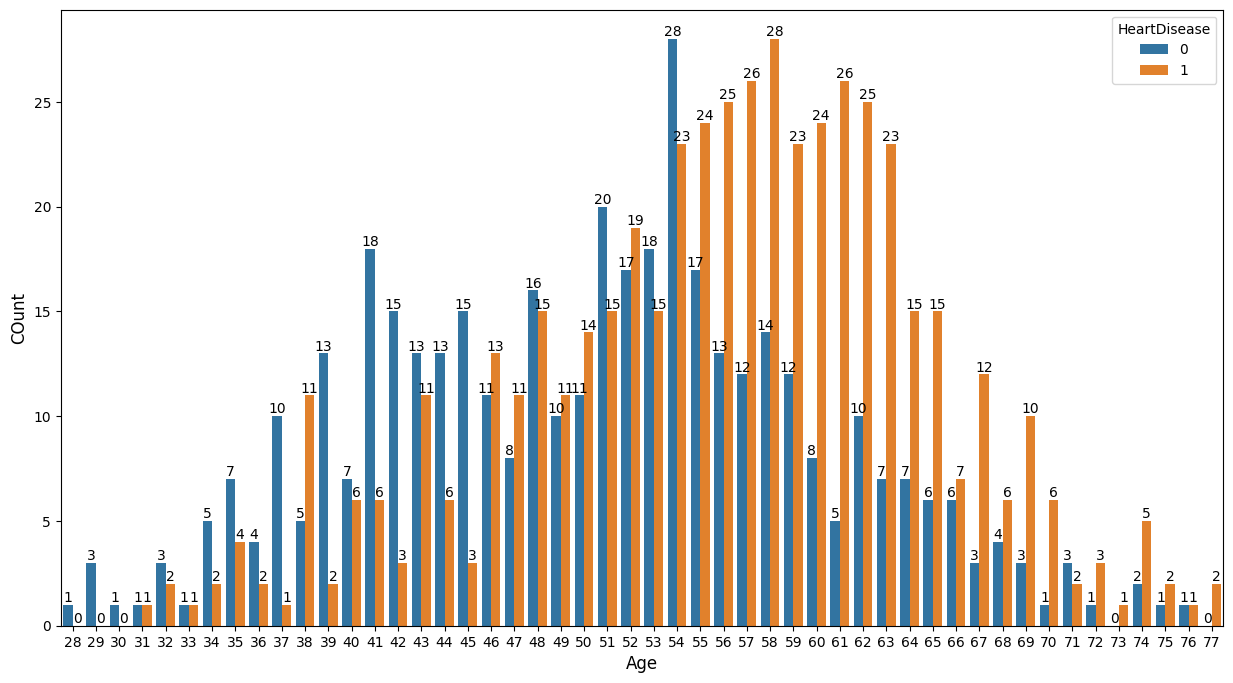

In [10]:
plt.subplots(figsize=(15,8))
ax=sns.countplot(x=(dataset['Age']),hue=(dataset['HeartDisease']))
plt.xlabel("Age",size=12)
plt.ylabel("COunt",size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

[Text(0, 0, '134.326'), Text(0, 0, '146.14')]

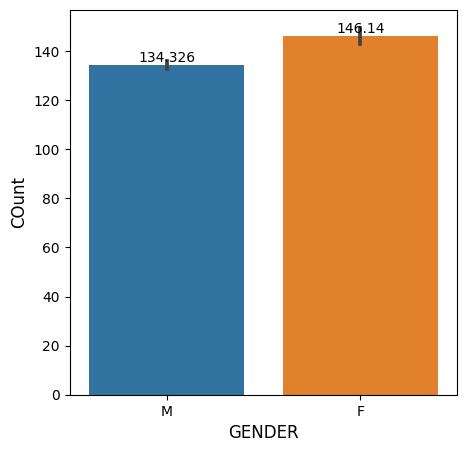

In [11]:
plt.subplots(figsize=(5,5))
ax=sns.barplot(x=(dataset['Sex']),y=(dataset['MaxHR']))
plt.xlabel("GENDER",size=12)
plt.ylabel("COunt",size=12)
ax.bar_label(ax.containers[0])

[Text(0, 0, '36'), Text(0, 0, '10')]

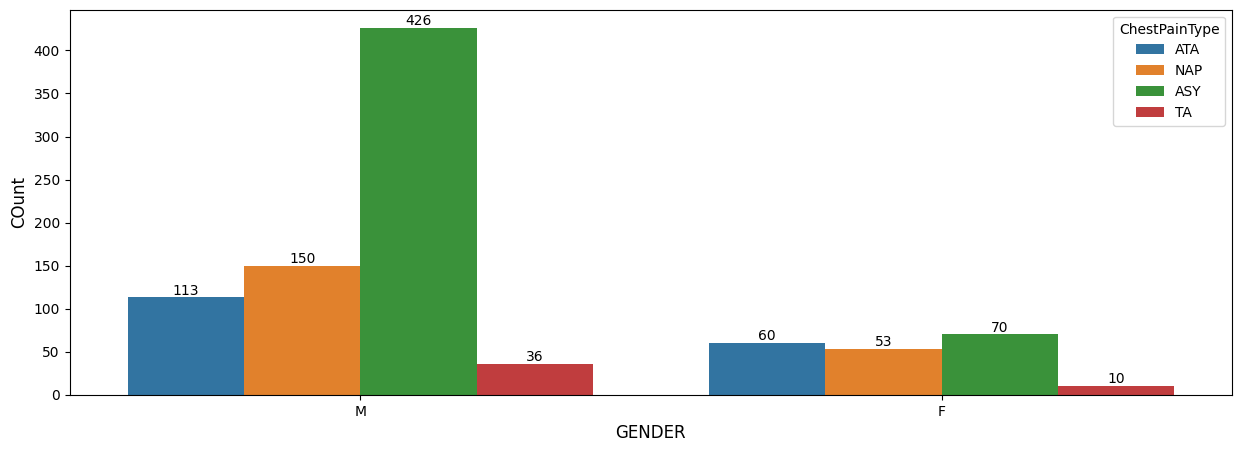

In [12]:
plt.subplots(figsize=(15,5))
ax=sns.countplot(x=(dataset['Sex']),hue=(dataset['ChestPainType']))
plt.xlabel("GENDER",size=12)
plt.ylabel("COunt",size=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

In [13]:
dataset.replace({'M':1,'F':0},inplace=True)
dataset.replace({'ATA':1 ,'NAP':2 ,'ASY':3 ,'TA':4},inplace=True)
dataset.replace({'Normal':1, 'ST':2 ,'LVH':3},inplace=True)
dataset.replace({'N':0 ,'Y':1},inplace=True)
dataset.replace({'Up':1 ,'Flat':2 ,'Down':3},inplace=True)

In [15]:
dataset.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [16]:
Patients_who_does_not_have_Heart_Attacks=dataset[dataset['HeartDisease']==0]
Patients_who_have_Heart_Attacks=dataset[dataset['HeartDisease']==1]
print("Patients_who_does_not_have_Heart_Attacks",len(Patients_who_does_not_have_Heart_Attacks))
print("Patients_who_have_Heart_Attacks",len(Patients_who_have_Heart_Attacks))

Patients_who_does_not_have_Heart_Attacks 410
Patients_who_have_Heart_Attacks 508


[Text(0, 0, '410'), Text(0, 0, '508')]

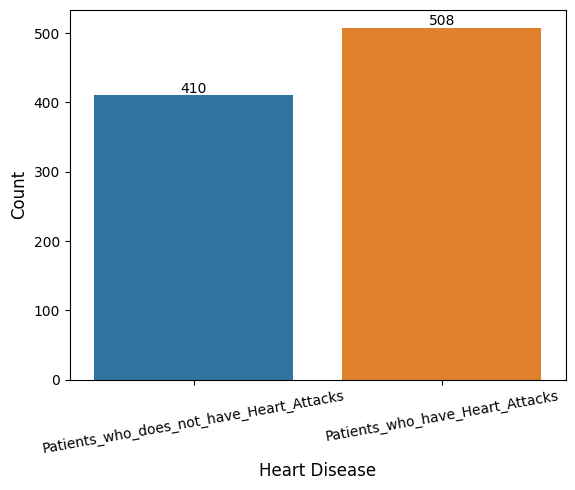

In [17]:
ax=sns.barplot(x=["Patients_who_does_not_have_Heart_Attacks","Patients_who_have_Heart_Attacks"],y=[len(Patients_who_does_not_have_Heart_Attacks),len(Patients_who_have_Heart_Attacks)])
plt.xticks(rotation=10)
plt.xlabel("Heart Disease",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])                                

In [179]:
new_Patients_who_does_not_have_Heart_Attacks=Patients_who_does_not_have_Heart_Attacks.sample(len(Patients_who_have_Heart_Attacks),replace=True)

In [183]:
dataset1=pd.concat([new_Patients_who_does_not_have_Heart_Attacks,Patients_who_have_Heart_Attacks])
dataset1.shape

(1016, 12)

# Spliting the data for training and testing

In [184]:
Data=dataset1.drop(columns=['HeartDisease'])
Target=dataset1['HeartDisease']

In [261]:
xtrain,xtest,ytrain,ytest=train_test_split(Data,Target,test_size=0.2)
scale=StandardScaler()
x_train=scale.fit_transform(xtrain)
x_test=scale.fit_transform(xtest)

In [186]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (812, 11)
The shape of ytrain is (812,)
The shape of xtest is (204, 11)
The shape of ytest is (204,)


# Linear Regression

BY using LinearRegression Algorithm we get the accuray of 47.0%
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       111
           1       1.00      0.16      0.28        93

    accuracy                           0.62       204
   macro avg       0.79      0.58      0.51       204
weighted avg       0.78      0.62      0.53       204



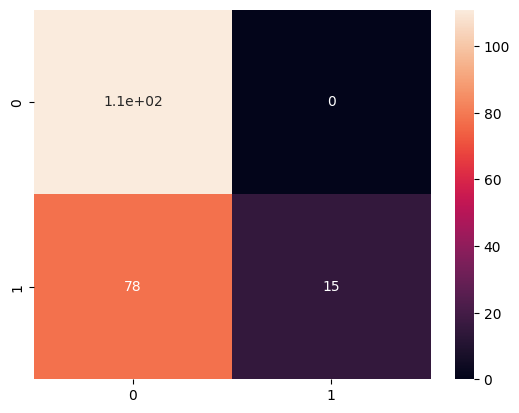

In [187]:
model_lr=LinearRegression()
model_lr.fit(xtrain,ytrain)
result=model_lr.score(xtest,ytest)
accuracy=result*100
predicted_values=model_lr.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using LinearRegression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Logistic Regression

BY using Logistic Regression Algorithm we get the accuray of 87.75%
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       111
           1       0.85      0.89      0.87        93

    accuracy                           0.88       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.88      0.88      0.88       204



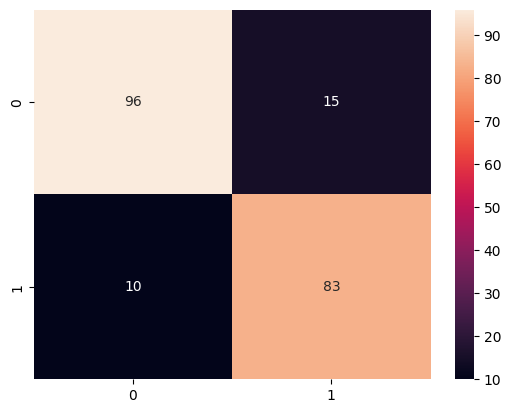

In [312]:
model_lrr=LogisticRegression()
model_lrr.fit(x_train,ytrain)
result=model_lrr.score(x_test,ytest)
accuracy=result*100
predicted_values=model_lrr.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Logistic Regression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Decision Tree Classifier

BY using Decision Tree Classifier Algorithm we get the accuray of 85.78%
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       111
           1       0.88      0.80      0.84        93

    accuracy                           0.86       204
   macro avg       0.86      0.85      0.86       204
weighted avg       0.86      0.86      0.86       204



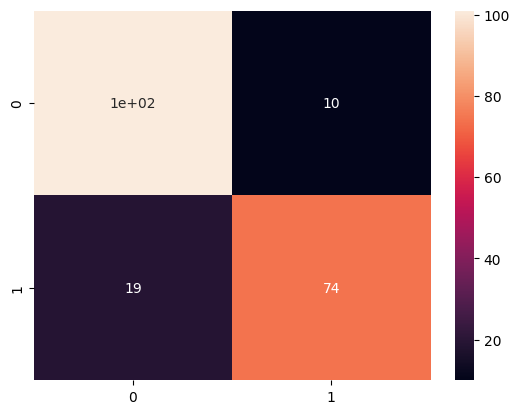

In [311]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,ytrain)
result=model_dt.score(x_test,ytest)
accuracy=result*100
predicted_values=model_dt.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Decision Tree Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Random Forest Classifier

BY using Random Forest Classifier Algorithm we get the accuray of 90.2%
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       111
           1       0.89      0.89      0.89        93

    accuracy                           0.90       204
   macro avg       0.90      0.90      0.90       204
weighted avg       0.90      0.90      0.90       204



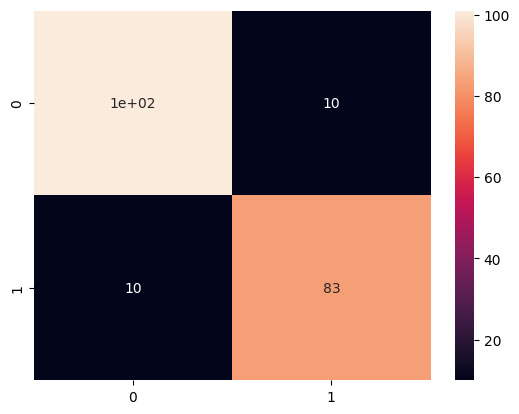

In [304]:
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,ytrain)
result=model_rf.score(x_test,ytest)
accuracy=result*100
predicted_values=model_rf.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Random Forest Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# SVC

BY using SVC Algorithm we get the accuray of 87.25%
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       111
           1       0.84      0.89      0.86        93

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204



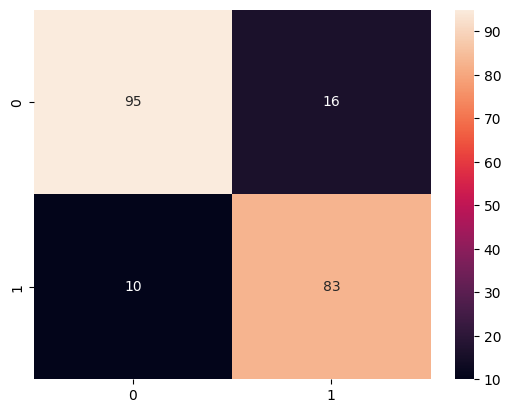

In [303]:
model_svc=SVC(C=1000,gamma=0.001)
model_svc.fit(x_train,ytrain)
result=model_svc.score(x_test,ytest)
accuracy=result*100
predicted_values=model_svc.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using SVC Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# knn

BY using knn Algorithm we get the accuray of 88.73%
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       111
           1       0.85      0.91      0.88        93

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204



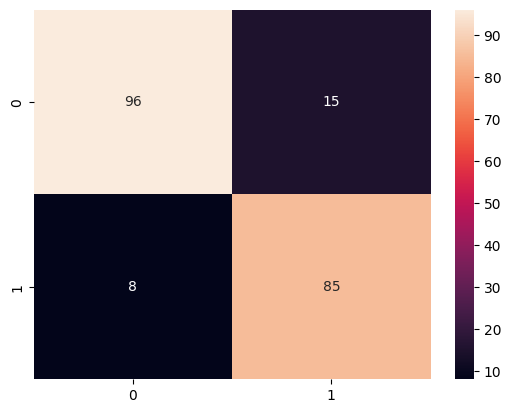

In [302]:
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train,ytrain)
result=model_knn.score(x_test,ytest)
accuracy=result*100
predicted_values=model_knn.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using knn Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# xgboost

BY using xgboost Algorithm we get the accuray of 86.76%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       111
           1       0.86      0.85      0.85        93

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204



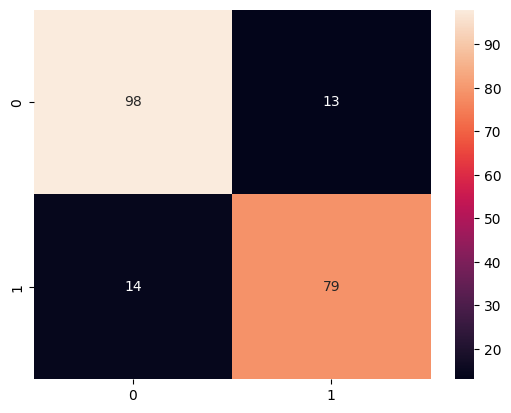

In [301]:
model_xgb=xgb.XGBClassifier(learning_rate=0.01)
model_xgb.fit(x_train,ytrain)
result=model_xgb.score(x_test,ytest)
accuracy=result*100
predicted_values=model_xgb.predict(x_test)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using xgboost Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Visualising the accuracy of each Algorithm

[Text(0, 0, '47'),
 Text(0, 0, '87.75'),
 Text(0, 0, '85.78'),
 Text(0, 0, '90.2'),
 Text(0, 0, '87.25'),
 Text(0, 0, '88.73'),
 Text(0, 0, '86.76')]

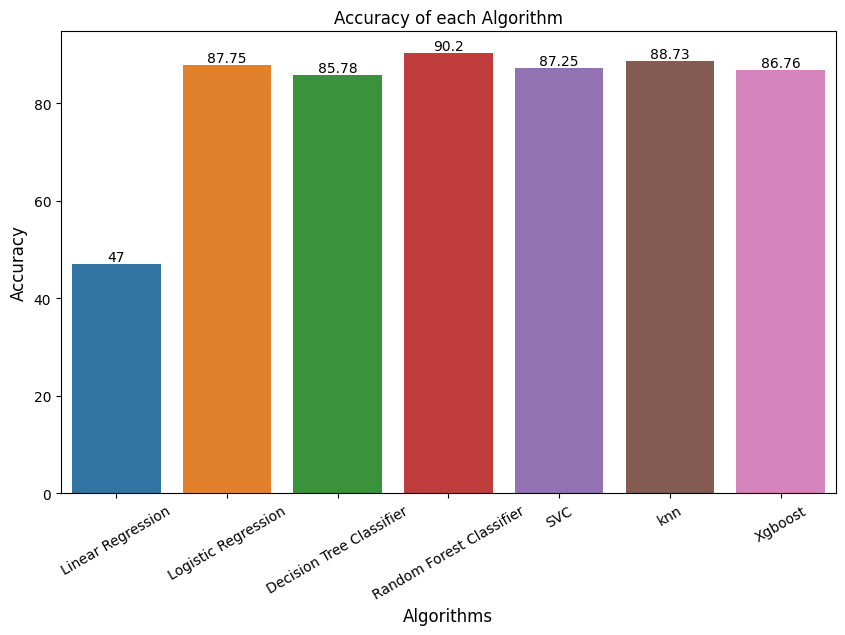

In [314]:
plt.subplots(figsize=(10,6))
ax=sns.barplot(x=["Linear Regression","Logistic Regression","Decision Tree Classifier","Random Forest Classifier","SVC","knn","Xgboost"],y=[47.0,87.75,85.78,90.2,87.25,88.73,86.76])
plt.xticks(rotation=30)
plt.title("Accuracy of each Algorithm")
plt.xlabel("Algorithms",size=12)
plt.ylabel("Accuracy",size=12)
ax.bar_label(ax.containers[0])

# StackingCVClassifier

C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https

BY using StackingCVClassifier Algorithm we get the accuray of 91.67%
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       111
           1       0.91      0.90      0.91        93

    accuracy                           0.92       204
   macro avg       0.92      0.92      0.92       204
weighted avg       0.92      0.92      0.92       204



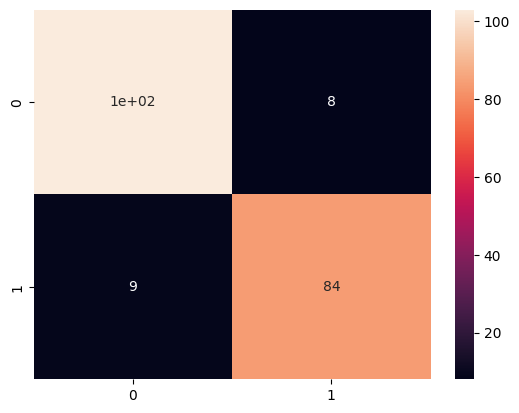

In [321]:
model_sc=StackingCVClassifier(classifiers=[model_rf,model_lrr,model_knn],meta_classifier= model_rf,random_state=42)
model_sc.fit(xtrain,ytrain)
result=model_sc.score(xtest,ytest)
accuracy=result*100
predicted_values=model_sc.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using StackingCVClassifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

In [293]:
pickle.dump(model_sc,open("Heart_Attack.p","wb"))